Подключим основные библиотеки для расчётов и построения графиков.

In [1]:
import numpy as np
from math import sin, cos, sqrt, acosh, cosh, sinh
import matplotlib
import matplotlib.lines as m_lines
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from typing import Iterable, Callable, Tuple, Any, List
from scipy.special import binom
from numpy.polynomial.polynomial import polyval

Функции вычисления границ графиков и их отрисовки:

In [2]:
def bounding_box(pts) -> Tuple[Tuple[float, float], Tuple[float, float]]:
    x_min = min(pts[0, :])
    y_min = min(pts[1, :])
    x_max = max(pts[0, :])
    y_max = max(pts[1, :])
    return (x_min, y_min), (x_max, y_max)

def graph_debug(_pts, title):
    fig, ax = plt.subplots()
    fig.canvas.set_window_title(title)

    # ax.set_aspect('equal')

    if len(_pts.shape) == 1:
        n = _pts.shape[0]
        pts = np.array([np.arange(n), _pts])
    else:
        n = _pts.shape[0]
        pts = _pts
    (x_min, y_min), (x_max, y_max) = bounding_box(pts)

    percent_left = 0.1
    x_inc = (x_max - x_min) * percent_left
    y_inc = (y_max - y_min) * percent_left

    ax.set_xlim(x_min - x_inc, x_max + x_inc)
    ax.set_ylim(y_min - y_inc, y_max + y_inc)

    ax.grid(True, which='both')
    plt.plot(pts[0, :], pts[1, :])

    plt.show()

Функция генерации выборки:

In [3]:
def generate(n, a = 0, b = 1):
    r = np.random.rand(n)
    return r*(b - a) + a

Функция, представляющая основной алгоритм:

In [4]:
def local_model_algo(x, eps = 5):
    n = x.shape[0]
    y = [(0, x[0])]

    st = 0
    i = 0
    while i < (n - 1):
        s = ((x[st + 1] - x[st])/x[st]) ** 2
        m = ((x[st + 1] - x[st])/x[st])
        i = st + 1

        while i < (n - 1):
            s = (i * s + x[i+1]**2)/(i + 1)
            m = (i * m + (x[i + 1] - x[i]) / x[i])/(i + 1)
            t = np.sqrt(s - m**2)
            i += 1
            if t >= eps:
                break

        alpha = m
        st = i
        y.append((i - 1, alpha * x[i - 1]))

    x_new = np.ndarray((2, len(y)))
    for j, tp in enumerate(y):
        x_new[:, j] = y[j]


    return x_new

Запускаем:

Approximation test


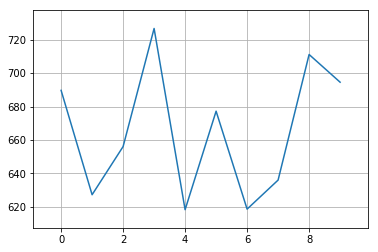

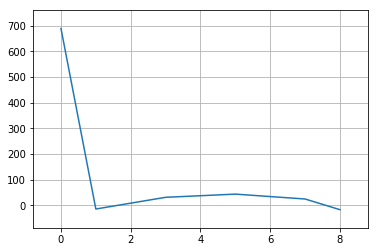

In [5]:
print("Approximation test")
pts = generate(10, 600, 800)
graph_debug(pts, "Before approximation")
ext_pts = local_model_algo(pts) # subset of pts
graph_debug(ext_pts, "After approximation")